In [2]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

Using TensorFlow backend.


In [4]:
dataset_train = pd.read_csv('/Users/dennis/git/Data/cleaned_2020.csv')

In [5]:
dataset_train.head()

,ds,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,...,03:N3723_1,03:N3727_1,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FC3197,03:FC3199,y
0,2020-01-01 00:00:00,780.512,81.377,3.404,3.408,3.401,0.299,41.446,134.946,125.628,...,1.0,1.0,27.521,36.051,36.309,22.818,320.155,297.566,325.710,943.431
1,2020-01-01 00:10:00,780.051,81.377,3.401,3.402,3.400,0.298,41.676,135.032,125.583,...,1.0,1.0,27.212,36.092,36.348,22.865,320.718,297.288,325.425,943.431
2,2020-01-01 00:20:00,779.416,81.329,3.397,3.403,3.399,0.300,41.762,134.732,125.600,...,1.0,1.0,27.832,35.906,36.276,22.869,320.184,297.656,325.233,943.073
3,2020-01-01 00:30:00,780.344,81.250,3.398,3.404,3.398,0.300,41.909,134.521,125.612,...,1.0,1.0,27.571,35.977,36.262,22.878,319.879,297.386,326.211,943.476
4,2020-01-01 00:40:00,780.231,81.377,3.403,3.405,3.399,0.298,41.983,134.352,125.703,...,1.0,1.0,27.194,36.000,36.246,22.850,320.310,297.659,325.206,943.175


In [6]:
# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:]

cols

['03:I3SROE',
 '03:T3362',
 '03:PI3061A',
 '03:PI3061B',
 '03:PI3061C',
 '03:PD3066',
 '03:T3492',
 '03:T3358',
 '03:TC3550',
 '03:TC3550A',
 '03:FV3762',
 '03:FC3762',
 '03:TC3730',
 '03:TV3730A',
 '03:TV3730B',
 '03:TV3730C',
 '03:T3731',
 '03:P3649',
 '03:P3065',
 '03:LC3661',
 '03:LI3661A',
 '03:LI3661B',
 '03:LI3661C',
 '03:YV4978',
 '03:FC3075.OP',
 '03:FC3075',
 '03:T3361',
 '03:T3359',
 '03:T3360',
 '03:N3722_1',
 '03:N3721_1',
 '03:N3725_1',
 '03:E3849',
 '03:T3626',
 '03:T3627',
 '03:T3628',
 '03:N3726_1',
 '03:E3850',
 '03:T3629',
 '03:T3630',
 '03:T3631',
 '03:N3723_1',
 '03:N3727_1',
 '03:E3851',
 '03:T3632',
 '03:T3633',
 '03:T3634',
 '03:FC3195',
 '03:FC3197',
 '03:FC3199',
 'y']

['03:I3SROE',
 '03:T3362',
 '03:PI3061A',
 '03:PI3061B',
 '03:PI3061C',
 '03:PD3066',
 '03:T3492',
 '03:T3358',
 '03:TC3550',
 '03:TC3550A',
 '03:FV3762',
 '03:FC3762',
 '03:TC3730',
 '03:TV3730A',
 '03:TV3730B',
 '03:TV3730C',
 '03:T3731',
 '03:P3649',
 '03:P3065',
 '03:LC3661',
 '03:LI3661A',
 '03:LI3661B',
 '03:LI3661C',
 '03:YV4978',
 '03:FC3075.OP',
 '03:FC3075',
 '03:T3361',
 '03:T3359',
 '03:T3360',
 '03:N3722_1',
 '03:N3721_1',
 '03:N3725_1',
 '03:E3849',
 '03:T3626',
 '03:T3627',
 '03:T3628',
 '03:N3726_1',
 '03:E3850',
 '03:T3629',
 '03:T3630',
 '03:T3631',
 '03:N3723_1',
 '03:N3727_1',
 '03:E3851',
 '03:T3632',
 '03:T3633',
 '03:T3634',
 '03:FC3195',
 '03:FC3197',
 '03:FC3199',
 'Durchsatz']

In [7]:
dataset_train = dataset_train[cols].fillna(0)

In [8]:
dataset_train.isna().any()

03:I3SROE       False
03:T3362        False
03:PI3061A      False
03:PI3061B      False
03:PI3061C      False
03:PD3066       False
03:T3492        False
03:T3358        False
03:TC3550       False
03:TC3550A      False
03:FV3762       False
03:FC3762       False
03:TC3730       False
03:TV3730A      False
03:TV3730B      False
03:TV3730C      False
03:T3731        False
03:P3649        False
03:P3065        False
03:LC3661       False
03:LI3661A      False
03:LI3661B      False
03:LI3661C      False
03:YV4978       False
03:FC3075.OP    False
03:FC3075       False
03:T3361        False
03:T3359        False
03:T3360        False
03:N3722_1      False
03:N3721_1      False
03:N3725_1      False
03:E3849        False
03:T3626        False
03:T3627        False
03:T3628        False
03:N3726_1      False
03:E3850        False
03:T3629        False
03:T3630        False
03:T3631        False
03:N3723_1      False
03:N3727_1      False
03:E3851        False
03:T3632        False
03:T3633  

In [145]:
dataset_train.isnull().any()

03:I3SROE       False
03:T3362        False
03:PI3061A      False
03:PI3061B      False
03:PI3061C      False
03:PD3066       False
03:T3492        False
03:T3358        False
03:TC3550       False
03:TC3550A      False
03:FV3762       False
03:FC3762       False
03:TC3730       False
03:TV3730A      False
03:TV3730B      False
03:TV3730C      False
03:T3731        False
03:P3649        False
03:P3065        False
03:LC3661       False
03:LI3661A      False
03:LI3661B      False
03:LI3661C      False
03:YV4978       False
03:FC3075.OP    False
03:FC3075       False
03:T3361        False
03:T3359        False
03:T3360        False
03:N3722_1      False
03:N3721_1      False
03:N3725_1      False
03:E3849        False
03:T3626        False
03:T3627        False
03:T3628        False
03:N3726_1      False
03:E3850        False
03:T3629        False
03:T3630        False
03:T3631        False
03:N3723_1      False
03:N3727_1      False
03:E3851        False
03:T3632        False
03:T3633  

In [9]:
dataset_train.head()

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:TC3550A,...,03:N3723_1,03:N3727_1,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FC3197,03:FC3199,y
0,780.512,81.377,3.404,3.408,3.401,0.299,41.446,134.946,125.628,0.0,...,1.0,1.0,27.521,36.051,36.309,22.818,320.155,297.566,325.710,943.431
1,780.051,81.377,3.401,3.402,3.400,0.298,41.676,135.032,125.583,0.0,...,1.0,1.0,27.212,36.092,36.348,22.865,320.718,297.288,325.425,943.431
2,779.416,81.329,3.397,3.403,3.399,0.300,41.762,134.732,125.600,0.0,...,1.0,1.0,27.832,35.906,36.276,22.869,320.184,297.656,325.233,943.073
3,780.344,81.250,3.398,3.404,3.398,0.300,41.909,134.521,125.612,0.0,...,1.0,1.0,27.571,35.977,36.262,22.878,319.879,297.386,326.211,943.476
4,780.231,81.377,3.403,3.405,3.399,0.298,41.983,134.352,125.703,0.0,...,1.0,1.0,27.194,36.000,36.246,22.850,320.310,297.659,325.206,943.175


In [147]:
dataset_train.dtypes

03:I3SROE       float64
03:T3362        float64
03:PI3061A      float64
03:PI3061B      float64
03:PI3061C      float64
03:PD3066       float64
03:T3492        float64
03:T3358        float64
03:TC3550       float64
03:TC3550A      float64
03:FV3762       float64
03:FC3762       float64
03:TC3730       float64
03:TV3730A      float64
03:TV3730B      float64
03:TV3730C      float64
03:T3731        float64
03:P3649        float64
03:P3065        float64
03:LC3661       float64
03:LI3661A      float64
03:LI3661B      float64
03:LI3661C      float64
03:YV4978       float64
03:FC3075.OP    float64
03:FC3075       float64
03:T3361        float64
03:T3359        float64
03:T3360        float64
03:N3722_1      float64
03:N3721_1      float64
03:N3725_1      float64
03:E3849        float64
03:T3626        float64
03:T3627        float64
03:T3628        float64
03:N3726_1      float64
03:E3850        float64
03:T3629        float64
03:T3630        float64
03:T3631        float64
03:N3723_1      

In [10]:
training_set = dataset_train[cols].values

In [11]:
training_set

array([[ 780.512,   81.377,    3.404, ...,  297.566,  325.71 ,  943.431],
       [ 780.051,   81.377,    3.401, ...,  297.288,  325.425,  943.431],
       [ 779.416,   81.329,    3.397, ...,  297.656,  325.233,  943.073],
       ...,
       [ 862.264,   82.583,    3.386, ...,  324.706,  357.074, 1038.749],
       [ 863.231,   82.583,    3.386, ...,  324.673,  358.477, 1040.391],
       [ 863.205,   82.583,    3.383, ...,  324.312,  357.478, 1038.243]])

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

In [13]:
training_set_scaled

array([[-0.93211914, -0.89023779, -0.52050408, ..., -0.8190561 ,
        -0.8349377 , -0.88388054],
       [-0.93910847, -0.89023779, -0.5516945 , ..., -0.82992677,
        -0.84473839, -0.88388054],
       [-0.94873586, -0.91063668, -0.59328173, ..., -0.81553681,
        -0.85134096, -0.88822279],
       ...,
       [ 0.30734245, -0.3777157 , -0.70764661, ...,  0.24220325,
         0.24361977,  0.27224838],
       [ 0.32200337, -0.3777157 , -0.70764661, ...,  0.24091285,
         0.29186669,  0.29216449],
       [ 0.32160918, -0.3777157 , -0.73883704, ...,  0.22679661,
         0.25751268,  0.26611102]])

In [14]:
trainX = training_set_scaled[:,1:50]
trainX

array([[-0.89023779, -0.52050408, -0.50170701, ..., -0.98936854,
        -0.8190561 , -0.8349377 ],
       [-0.89023779, -0.5516945 , -0.56410245, ..., -0.96922086,
        -0.82992677, -0.84473839],
       [-0.91063668, -0.59328173, -0.55370321, ..., -0.98833074,
        -0.81553681, -0.85134096],
       ...,
       [-0.3777157 , -0.70764661, -0.68889333, ...,  0.32806806,
         0.24220325,  0.24361977],
       [-0.3777157 , -0.70764661, -0.68889333, ...,  0.33780194,
         0.24091285,  0.29186669],
       [-0.3777157 , -0.73883704, -0.72009104, ...,  0.30960234,
         0.22679661,  0.25751268]])

In [15]:
trainY = training_set_scaled[:,50:51]
trainY

array([[-0.88388054],
       [-0.88388054],
       [-0.88822279],
       ...,
       [ 0.27224838],
       [ 0.29216449],
       [ 0.26611102]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [18]:
X_train.shape

(27015, 1, 49)

In [157]:
#X_train = X_train.reshape(1,384582, 49)
#y_train = y_train.reshape(1, 384582, 1)
#X_test = X_test.reshape(1,189422, 49)
#y_test = y_test.reshape(1, 189422, 1)

In [19]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, input_shape=(1, 49)))
model.add(tf.keras.layers.Dense(1))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(loss='mae', optimizer=opt)

In [20]:
X_train.shape

(27015, 1, 49)

In [21]:
X_test.shape

(13306, 1, 49)

In [22]:
y_train.shape

(27015, 1, 1)

In [23]:
y_test.shape

(13306, 1)

In [24]:
import matplotlib.pyplot as plt

Train on 27015 samples, validate on 13306 samples
Epoch 1/50
27015/27015 - 3s - loss: 0.2528 - val_loss: 0.2096
Epoch 2/50
27015/27015 - 1s - loss: 0.1658 - val_loss: 0.1946
Epoch 3/50
27015/27015 - 1s - loss: 0.1628 - val_loss: 0.2161
Epoch 4/50
27015/27015 - 1s - loss: 0.1581 - val_loss: 0.1481
Epoch 5/50
27015/27015 - 1s - loss: 0.1548 - val_loss: 0.1665
Epoch 6/50
27015/27015 - 1s - loss: 0.1494 - val_loss: 0.2171
Epoch 7/50
27015/27015 - 1s - loss: 0.1464 - val_loss: 0.1999
Epoch 8/50
27015/27015 - 1s - loss: 0.1466 - val_loss: 0.1533
Epoch 9/50
27015/27015 - 1s - loss: 0.1462 - val_loss: 0.1841
Epoch 10/50
27015/27015 - 1s - loss: 0.1465 - val_loss: 0.1671
Epoch 11/50
27015/27015 - 1s - loss: 0.1451 - val_loss: 0.1793
Epoch 12/50
27015/27015 - 1s - loss: 0.1452 - val_loss: 0.1725
Epoch 13/50
27015/27015 - 1s - loss: 0.1460 - val_loss: 0.1434
Epoch 14/50
27015/27015 - 1s - loss: 0.1448 - val_loss: 0.1309
Epoch 15/50
27015/27015 - 1s - loss: 0.1454 - val_loss: 0.1755
Epoch 16/50
27

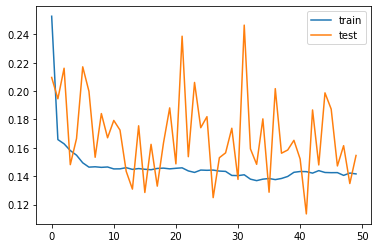

In [25]:
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
# plot history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [26]:
yhat = model.predict(X_test, verbose=0)
print(yhat)

[[-1.13978  ]
 [-0.4638672]
 [ 1.2841723]
 ...
 [ 0.6484722]
 [-1.1047769]
 [-1.1410458]]


In [30]:
yhat.reshape(13306,1)

array([[-1.13978  ],
       [-0.4638672],
       [ 1.2841723],
       ...,
       [ 0.6484722],
       [-1.1047769],
       [-1.1410458]], dtype=float32)

In [32]:
y_test.reshape(13306,1)

array([[-1.28396145],
       [-0.37963425],
       [ 1.2418912 ],
       ...,
       [ 0.53126696],
       [-1.31765631],
       [-1.29359202]])

In [33]:
yhat.shape

(13306, 1)

In [34]:
y_test.shape

(13306, 1)

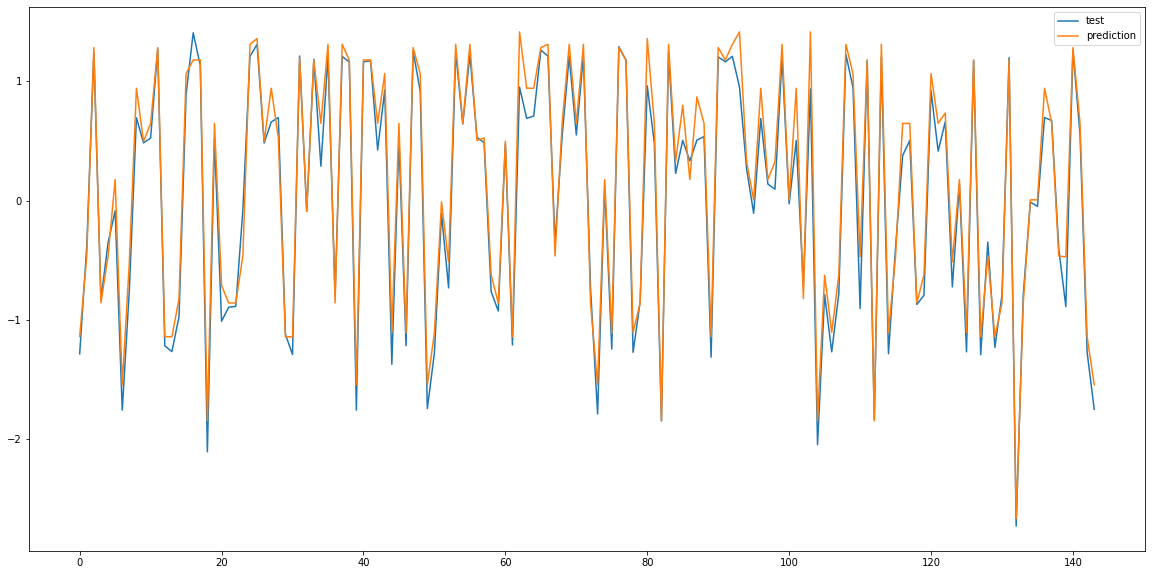

In [36]:
plt.figure(figsize=(20,10))
plt.plot(y_test[:144], label='test')
plt.plot(yhat[:144], label='prediction')
plt.legend()
plt.show()